**Digit Classifier with Pytorch**

A neural network of your own design to evaluate the MNIST dataset

In [1]:
!pip install ipywidgets==8.1.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define transforms
transform = transforms.ToTensor()

# Create training set and define training dataloader
train_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/Cartera/digits', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/Cartera/digits', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 529kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


In [5]:
## This cell contains a function for showing 5 images from a dataloader – OBTAINED FROM INTERNET
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Visualizing 5 training images:
6


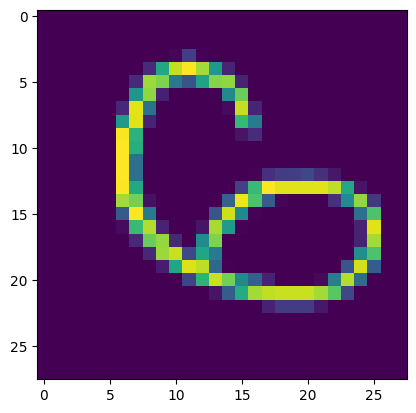

8


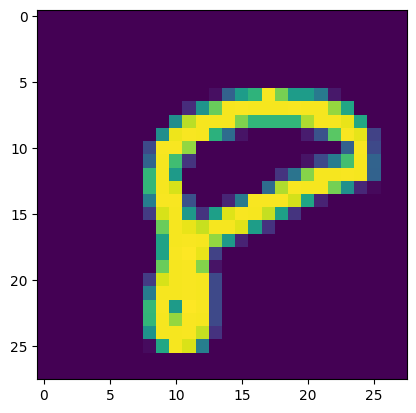

4


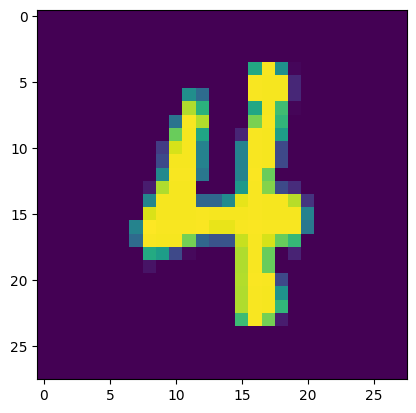

8


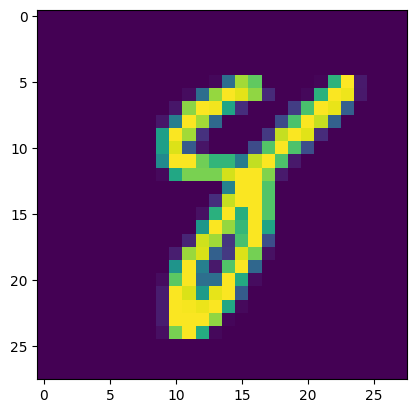

1


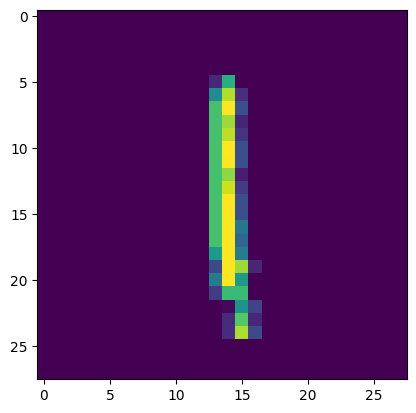

Visualizing 5 testing images:
7


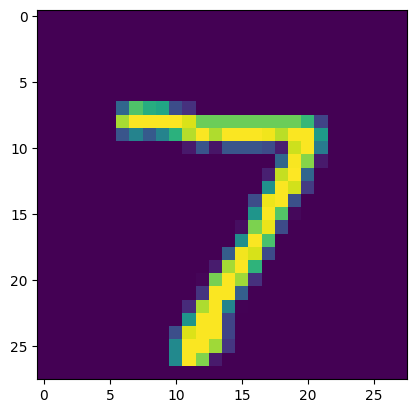

2


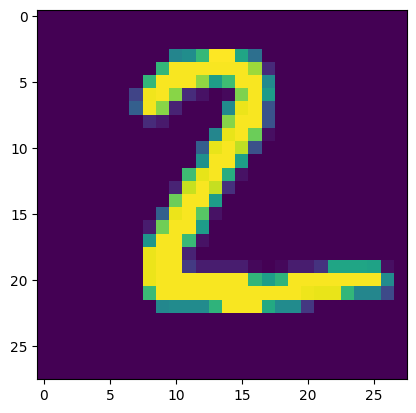

1


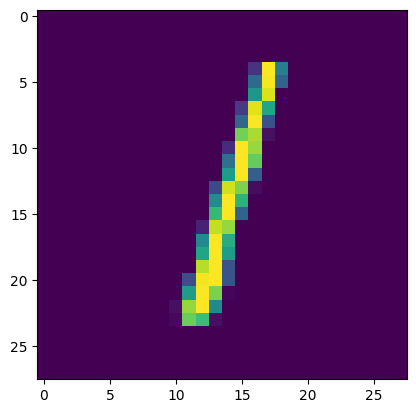

0


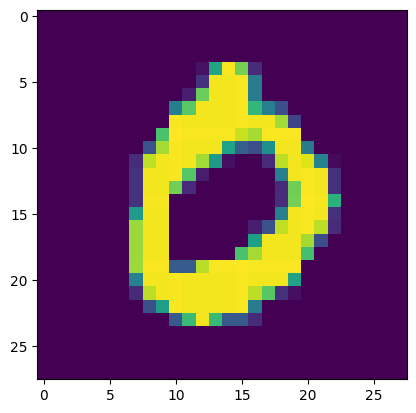

4


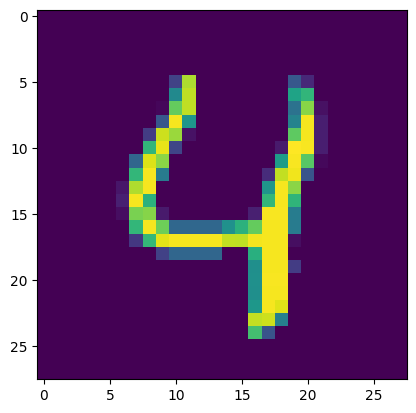

In [6]:
# Explore data
print("Visualizing 5 training images:")
show5(train_loader)

# Usar la función con el test_loader
print("Visualizing 5 testing images:")
show5(test_loader)

**Build the Neural Network**

In [7]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten() #Flatten the 28x28 image to a 784 vector
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

print(model)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Running**

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for training.")
model.to(device)

epochs = 10
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Print the loss every 250 batches
        if i % 250 == 249:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 250:.3f}")
            running_loss = 0.0

    # Mean loss for the epoch
    epoch_loss = 0.0
    with torch.no_grad():
        for data in train_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()
    epoch_loss/=len(train_loader)
    losses.append(epoch_loss)

    print(f"Epoch {epoch+1} average loss: {epoch_loss:.3f}")

print("Entrenamiento finalizado.")

Using cpu for training.
[1,   250] loss: 0.627
[1,   500] loss: 0.278
[1,   750] loss: 0.218
Epoch 1 average loss: 0.150
[2,   250] loss: 0.143
[2,   500] loss: 0.133
[2,   750] loss: 0.130
Epoch 2 average loss: 0.113
[3,   250] loss: 0.094
[3,   500] loss: 0.091
[3,   750] loss: 0.096
Epoch 3 average loss: 0.077
[4,   250] loss: 0.070
[4,   500] loss: 0.070
[4,   750] loss: 0.073
Epoch 4 average loss: 0.055
[5,   250] loss: 0.052
[5,   500] loss: 0.053
[5,   750] loss: 0.060
Epoch 5 average loss: 0.043
[6,   250] loss: 0.041
[6,   500] loss: 0.043
[6,   750] loss: 0.044
Epoch 6 average loss: 0.030
[7,   250] loss: 0.030
[7,   500] loss: 0.033
[7,   750] loss: 0.043
Epoch 7 average loss: 0.028
[8,   250] loss: 0.027
[8,   500] loss: 0.032
[8,   750] loss: 0.029
Epoch 8 average loss: 0.023
[9,   250] loss: 0.017
[9,   500] loss: 0.023
[9,   750] loss: 0.033
Epoch 9 average loss: 0.017
[10,   250] loss: 0.019
[10,   500] loss: 0.020
[10,   750] loss: 0.025
Epoch 10 average loss: 0.013
En

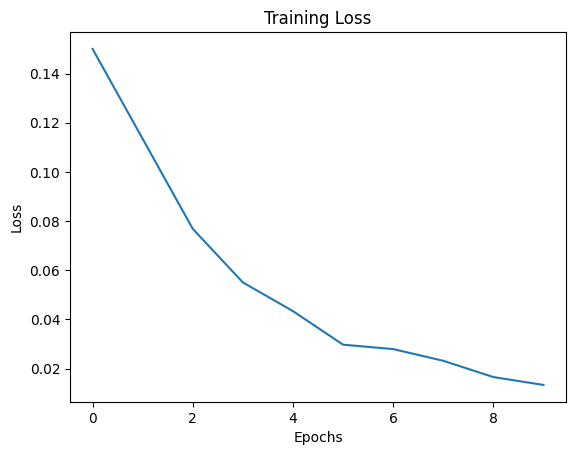

In [10]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

**Testing**

In [11]:
# Move the model to evaluation mode,
# this inactvate dropout and tinks like that.
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calcular la precisión
accuracy = 100 * correct / total
print(f"The model accuracy: {accuracy:.2f}%")

if accuracy > 90:
    print("All good!")
else:
    print("Check the model")

The model accuracy: 97.52%
All good!


In [ ]:
# Optional
torch.save(improved_model.state_dict(), 'improved_mnist_model.pth')
print("Improved model saved as improved_mnist_model.pth")

torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved as mnist_model.pth")